# Univariate Linear Regression

In its most simplified form, univariate linear regression, there is only one feature or variable used to train the model such as an stock price. This is similar to having a feature only aligned to the x-axis with the output vector on the y-axis.

This model has a parallel to the equation of a line where 
y
 is the value output when the gradient is 
m
, 
x
 is the only input variable and 
c
 is the y-intercept (equation 1). The hypothesis or predicted value 
 ,
h
θ
(
x
)
 corresponds to 
y
, the learned parameters 
θ
0
 and 
θ
1
 correspond to 
c
 and 
m
respectively, and the feature 
x
1
 corresponds to 
x
 (equation 2).

y
=
c
+
m
x
−
(
1
)
, 

h
θ
(
x
)
=
θ
0
+
θ
1
x
1
−
(
2
)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-white")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


# Read csv file

In [84]:
sap_df = pd.read_csv('sap_stock.csv', index_col=[0])

In [85]:
sap_df.head()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
Date,,,,,,,,,,
2009-03-09,25.16,25.82,24.48,25.59,NaN,5749357.0,145200289.0,NaN,NaN,NaN
2009-03-10,25.68,26.95,25.68,26.87,NaN,7507770.0,198480965.0,NaN,NaN,NaN
2009-03-11,26.50,26.95,26.26,26.64,NaN,5855095.0,155815439.0,NaN,NaN,NaN
2009-03-12,26.15,26.47,25.82,26.18,NaN,6294955.0,164489409.0,NaN,NaN,NaN
2009-03-13,26.01,26.24,25.65,25.73,NaN,6814568.0,176228331.0,NaN,NaN,NaN


In [4]:
sap_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2550 entries, 2009-03-09 to 2019-03-08
Data columns (total 10 columns):
Open                     2242 non-null float64
High                     2543 non-null float64
Low                      2543 non-null float64
Close                    2550 non-null float64
Change                   11 non-null float64
Traded Volume            2504 non-null float64
Turnover                 2497 non-null float64
Last Price of the Day    0 non-null float64
Daily Traded Units       0 non-null float64
Daily Turnover           7 non-null float64
dtypes: float64(10)
memory usage: 219.1+ KB


In [5]:
sap_df.shape

(2550, 10)

In [6]:
sap_df.index

Index(['2009-03-09', '2009-03-10', '2009-03-11', '2009-03-12', '2009-03-13',
       '2009-03-16', '2009-03-17', '2009-03-18', '2009-03-19', '2009-03-20',
       ...
       '2019-02-25', '2019-02-26', '2019-02-27', '2019-02-28', '2019-03-01',
       '2019-03-04', '2019-03-05', '2019-03-06', '2019-03-07', '2019-03-08'],
      dtype='object', name='Date', length=2550)

# predict "Close" value against Date

Text(0.5,1,'Close vs Date - Pandas')

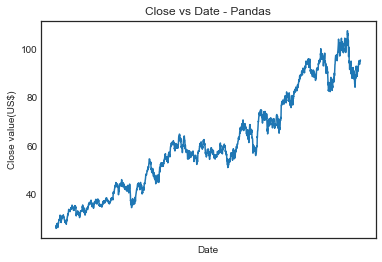

In [7]:
sap_df[["Close"]].plot(legend=False)
plt.ylabel("Close value(US$)")
plt.title("Close vs Date - Pandas")

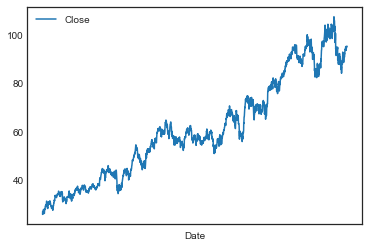

In [8]:
sap_df[["Close"]].plot(legend=True)

# Remove unwanted fields

In [9]:
sap_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume', 'Turnover',
       'Last Price of the Day', 'Daily Traded Units', 'Daily Turnover'],
      dtype='object')

In [10]:
sap_df.drop(columns=['Change', 'Last Price of the Day', 'Daily Traded Units', 'Daily Turnover'], inplace=True)

In [19]:
sap_df.index = pd.to_datetime(sap_df.index)

In [20]:
from matplotlib import gridspec

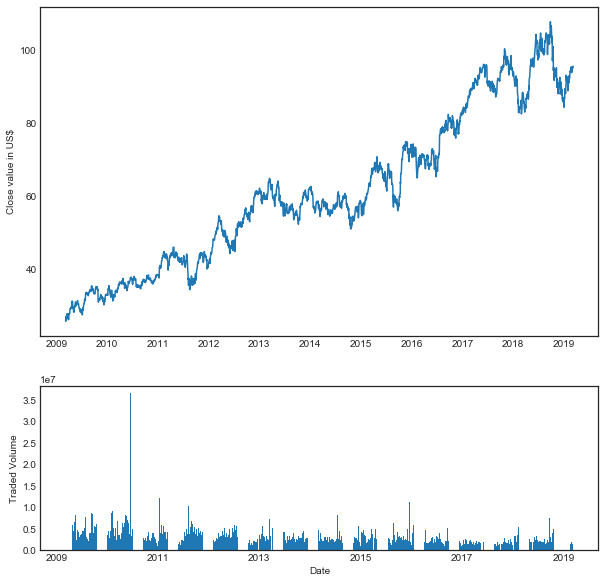

In [80]:
fig = plt.figure(1, figsize=(10,10))
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
ax0 = plt.subplot(gs[0])
plt.plot(sap_df.index, sap_df[["Close"]])
plt.ylabel("Close value in US$")

ax1 = plt.subplot(gs[1])
plt.bar(sap_df.index, sap_df["Traded Volume"], width=1)
plt.xlabel("Date")
plt.ylabel("Traded Volume")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F382564908>,
      dtype=object)

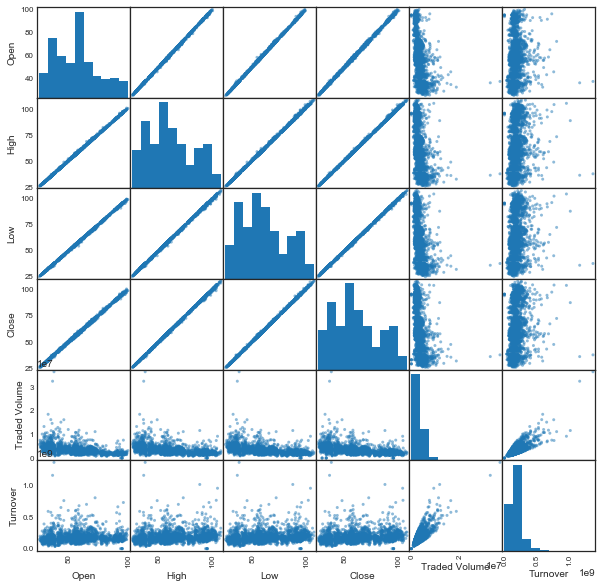

In [21]:
from pandas.plotting import scatter_matrix
attributes = sap_df.columns
scatter_matrix(sap_df[attributes], figsize=(10, 10))

In [ ]:
#prepocessing

In [23]:
from datetime import date, time, timedelta

dates = sap_df.index
elapsed = dates - dates[0]
sap_df["Days Elapsed"] = elapsed.days

In [24]:
sap_df.head()

,Open,High,Low,Close,Traded Volume,Turnover,Days Elapsed
Date,,,,,,,
2009-03-09,25.16,25.82,24.48,25.59,5749357.0,145200289.0,0
2009-03-10,25.68,26.95,25.68,26.87,7507770.0,198480965.0,1
2009-03-11,26.50,26.95,26.26,26.64,5855095.0,155815439.0,2
2009-03-12,26.15,26.47,25.82,26.18,6294955.0,164489409.0,3
2009-03-13,26.01,26.24,25.65,25.73,6814568.0,176228331.0,4


In [42]:
X = sap_df["Days Elapsed"]
y = sap_df["Close"]

In [28]:
type(X), type(y)

(pandas.core.series.Series, pandas.core.series.Series)

In [29]:
X.shape

(2550,)

In [30]:
y.shape

(2550,)

In [43]:
X.head()

Date
2009-03-09    0
2009-03-10    1
2009-03-11    2
2009-03-12    3
2009-03-13    4
Name: Days Elapsed, dtype: int64

In [44]:
y.head()

Date
2009-03-09    25.59
2009-03-10    26.87
2009-03-11    26.64
2009-03-12    26.18
2009-03-13    25.73
Name: Close, dtype: float64

In [45]:
X = X.values.reshape(-1, 1)

In [46]:
type(X), X.shape

(numpy.ndarray, (2550, 1))

In [47]:
X

array([[   0],
       [   1],
       [   2],
       ...,
       [3649],
       [3650],
       [3651]], dtype=int64)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [51]:
X_test, X_train, y_test, y_train = train_test_split(X, y, random_state=0)

In [52]:
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)
y_pred = linearModel.predict(X_test)

In [53]:
linearModel.score(X_train, y_train)

0.9304680095947904

# Mean Squared Error


In [54]:
mse = metrics.mean_squared_error(y_test, y_pred)
mse

29.368610017203977

In [57]:
np.asscalar(np.squeeze(linearModel.coef_))

0.01916538490405149

In [58]:
np.asscalar(np.squeeze(linearModel.intercept_))

26.09275324729488

In [61]:
X_train.reshape(1, -1)

array([[ 788,  548,  940, 1801, 3277,  541, 3476,  189, 1029,  969, 3294,
         564,  254, 1438, 1766, 2292, 1739, 2003, 2262, 2096, 2361,  822,
        2073, 1053, 1773, 3332, 1590,  843, 2642, 1522, 1617, 2692, 2759,
        2650, 1729, 3271,  268, 1191, 1002, 1003, 3102, 2405, 3509, 1396,
        1122, 3206,   45,  676, 3243,  821, 1373, 2747,  163, 1771, 2451,
        2391,  966, 1026, 3587, 2388,   73, 3602, 2367, 2433, 1338, 1219,
        1586, 2628, 1500, 1662, 3490, 1305, 1310, 3494, 3516, 2107,  424,
        3193, 2748, 1614, 1908,  407,  623, 1828, 2510,  569, 2184,  612,
        1878, 1366,  954, 1480,  765, 3173, 1555, 2033, 2289, 2143,  976,
        3112, 1249,  312, 2571, 1814, 1494, 3434,  674, 1246, 2654, 1955,
        1649, 1577, 2516, 1718, 1985, 1935, 2992, 2782, 2327,  970,  689,
        2012,  991, 1117,  794, 1291, 2310, 1687, 2954, 2956, 1535,  653,
        2430, 3048, 2968, 2615, 1121,  799, 3124, 2795, 2075, 1079, 2835,
         638, 3236, 1540,  144, 1796, 

In [65]:
#convert_time_elapsed_to_date
def convert_time_elapsed_to_date(days_elapsed, df):
    days_elapsed = days_elapsed.reshape(1, -1)[0]
    days_elapsed = pd.to_timedelta(days_elapsed, unit="d")
    return df.index[0] + days_elapsed

In [66]:
convert_time_elapsed_to_date(X_train, sap_df)

DatetimeIndex(['2011-05-06', '2010-09-08', '2011-10-05', '2014-02-12',
               '2018-02-27', '2010-09-01', '2018-09-14', '2009-09-14',
               '2012-01-02', '2011-11-03',
               ...
               '2014-12-23', '2010-05-05', '2016-08-18', '2009-04-20',
               '2012-09-27', '2016-11-15', '2014-11-17', '2013-11-04',
               '2016-06-09', '2011-03-08'],
              dtype='datetime64[ns]', length=638, freq=None)

Text(0.5,1,'Fitted Model Plot')

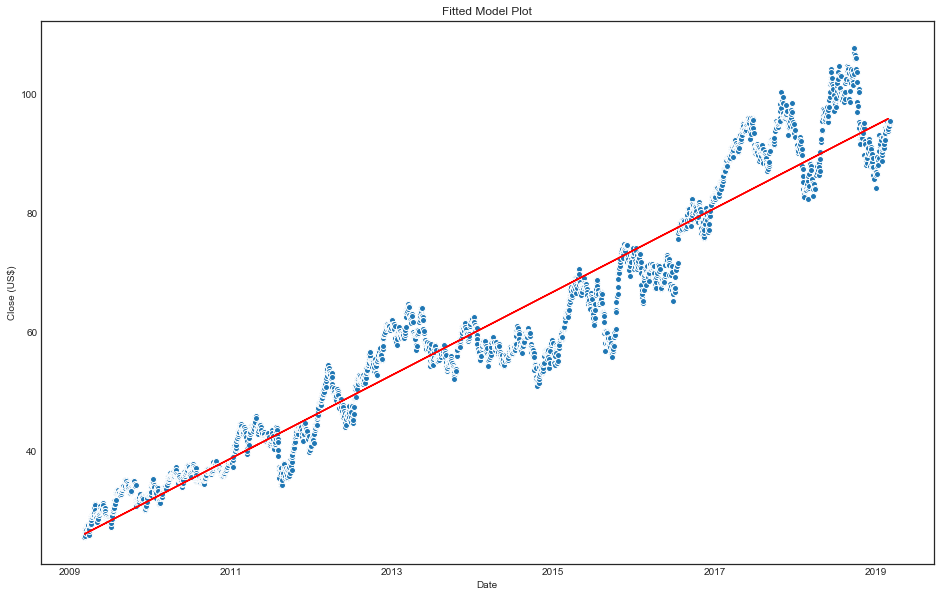

In [81]:
plt.figure(1, figsize=(16, 10))
hypothesis_function = linearModel.intercept_ + (linearModel.coef_ * X_train)

#plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
#plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')

#plt.plot(sap_df.index, sap_df["Close"])
#plt.scatter(convert_time_elapsed_to_date(X_train, sap_df), hypothesis_function)
plt.plot(convert_time_elapsed_to_date(X_train, sap_df), hypothesis_function, color='r', label='Predicted Price')
plt.scatter(sap_df.index, sap_df["Close"], edgecolor='w', label='Actual Price')

plt.ylabel("Close (US$)")
plt.xlabel("Date")
plt.title("Fitted Model Plot")

### Accuracy Evaluation Metrics

To see how accurate our model is, we can calculate the **Coefficient of determination**, which describes the ratio between the total error and the error, that is explained by our model. Its value is between 0 and 1, with 1 meaning 100% of the error is acoounted for by the model. 

**Coefficient of determination**
$$
R^2 = 1 - \frac{RSS}{TSS}
$$

with  

**Residual Sum of Squares (RSS)**
$$
RSS = \sum_{i = 1}^{N} \epsilon_i^2 = \sum_{i = 1}^{N} (y_i - \hat{y}_i)^2
$$

**Total Sum of Squares (TSS)**
$$
TSS = \sum_{i = 1}^{N} (y_i - \bar{y}_i)^2
$$

In [73]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.233070056175494
Mean Squared Error: 29.368610017203977
Root Mean Squared Error: 5.419281319252948


In [74]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.9344986131012354


The value of $R^2$ shows that are model accounts for nearly 94% of the differences between the actual stock prices and the predicted prices. 

In [75]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.9345450092991743